##**Evaluación 2 -  Fundamentos de Machine Learning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##1. Luego de Cargar las Librerías, cargamos el archivo Productividad_RedesSociales para poder leerlo.

In [2]:
#Cargar la base de datos
df = pd.read_csv('/content/Productividad_RedesSociales.csv')

In [4]:
#Ver las cabeceras? no recuerdo como se llaman
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [3]:
#Volumen de datos
filas, columnas = df.shape
print(f"El conjunto de datos tiene {filas} filas y {columnas} columnas.\n")

El conjunto de datos tiene 30000 filas y 19 columnas.



In [74]:
#Clasificación de Variables para cumplimiento de la rúbrica.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

**Variables Clasificadas**

1.   Variables Númericas Continuas

*   age - años de edad, valor continua
*   daily_social_media_time - horas diarias en redes sociales
*   work_hours_per_day - cantidad de horas trabajadas al día
*   perceived_productivity_score - puntuación percibida de productividad
*   sleep_hours - cantidad de horas dormidas
*   screen_time_before_sleep - tiempo de uso de pantallas antes de dormir
*   weekly_offline_hours - horas de desconexión semanal.
*   job_satisfaction_score - si se interpreta como valor continuo

2.   Variables Númericas Discretas

*   number_of_notifications - cantidad de notificaciones recibidas
*   breaks_during_work - número de pausas en la jornada
*   coffee_consumption_per_day - tazas de café por día
*   days_feeling_burnout_per_month - días sintiéndose quemado/a por mes
*   stress_level - escala de 0 a 10

3.   Variables Categóricas nominales

*   gender - categorías sin orden (Male, Female, Other)
*   job_type - tipo de trabajo (IT, Finance, Health, etc.)
*   social_platform_preference - red social favorita
*   uses_focus_apps - uso de apps de concentración (True/False)
*   has_digital_wellbeing_enabled - bienestar digital activado (True/False)

4.   Variables Categóricas Ordinales

*   stress_level - si se interpreta por nivles y no por escala
*   job_satisfaction_score - si se considera como percepción ordinal de satisfacción






In [9]:
## diferencia entre el cuadrado del cuartil 3 menos el cuartil 2 (solo columnas numéricas)
df_numerico = df.select_dtypes(include='number')
q3 = df_numerico.quantile(0.75)
q2 = df_numerico.quantile(0.50)
diferencia = (q3 ** 2) - q2
print("Diferencia entre el cuadrado del cuartil 3 menos el cuartil 2:")
print(diferencia, "\n")

Diferencia entre el cuadrado del cuartil 3 menos el cuartil 2:
age                               2768.000000
daily_social_media_time             16.061519
number_of_notifications           4165.000000
work_hours_per_day                  62.810787
perceived_productivity_score        47.266492
actual_productivity_score           37.641403
stress_level                        58.000000
sleep_hours                         49.813821
screen_time_before_sleep             1.176022
breaks_during_work                  59.000000
coffee_consumption_per_day           7.000000
days_feeling_burnout_per_month     560.000000
weekly_offline_hours               224.101086
job_satisfaction_score              38.362760
dtype: float64 



In [8]:
#Varianza de todas las columnas numéricas
varianzas = df_numerico.var()
print("Varianza de las columnas numéricas:")
print(varianzas)
#La varianza solo se calcula sobre columnas numéricas.
#las columnas categoricas no permiten esta operación.

Varianza de las columnas numéricas:
age                               191.413341
daily_social_media_time             4.304848
number_of_notifications            59.656655
work_hours_per_day                  3.990948
perceived_productivity_score        4.094433
actual_productivity_score           3.547113
stress_level                        8.215926
sleep_hours                         2.143307
screen_time_before_sleep            0.426873
breaks_during_work                 10.072608
coffee_consumption_per_day          1.988232
days_feeling_burnout_per_month     85.617197
weekly_offline_hours               53.004448
job_satisfaction_score              4.499462
dtype: float64


##2. Seguimos con la pregunda 2, para responderla primero haré una copia de la información

In [10]:
df2=df.copy()

In [16]:
df2.head()
#revisando que no haya cambiado nada n.n

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [15]:
#revisamos los nulos
print("Valores nulos por columna:\n")
df2.isnull().sum()

Valores nulos por columna:



,0
age,0
gender,0
job_type,0
daily_social_media_time,2765
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
perceived_productivity_score,1614
actual_productivity_score,2365
stress_level,1904


In [20]:
# Separar columnas numéricas y categóricas
num_cols = df2.select_dtypes(include='number').columns
cat_cols = df2.select_dtypes(exclude='number').columns

In [21]:
#reemplazo en columnas númericas por la mediana
for col in num_cols:
    if df2[col].isnull().sum()>0:
      mediana = df2[col].median()
      df2[col].fillna(mediana, inplace=True)


In [22]:
#ahora reemplazo las columnas categoricas por la moda
for col in cat_cols:
    if df2[col].isnull().sum()>0:
      moda = df2[col].mode()[0]
      df2[col].fillna(moda, inplace=True)

In [27]:
#verificación final
df2.isnull().sum().sum() == 0



np.True_

In [25]:
# Mostrar columnas que aún tienen valores nulos
print("Columnas con nulos aún presentes:\n")
print(df2.isnull().sum()[df2.isnull().sum() > 0])

Columnas con nulos aún presentes:

Series([], dtype: int64)


In [28]:
#doble check porque me da amziedah
print ("\n ¿hay valores nulos?:", "NO" if df2.isnull().sum().sum() == 0 else "SI")
print ("\n ¿hay valores duplicados?:", "NO" if df2.duplicated().sum() == 0 else "SI")


 ¿hay valores nulos?: NO

 ¿hay valores duplicados?: NO


##3. Gráfico por Género

In [29]:
#primero cuento cuantos registros hay por genero para luego diagramar
df2['gender'].value_counts()


,count
gender,
Male,14452
Female,14370
Other,1178


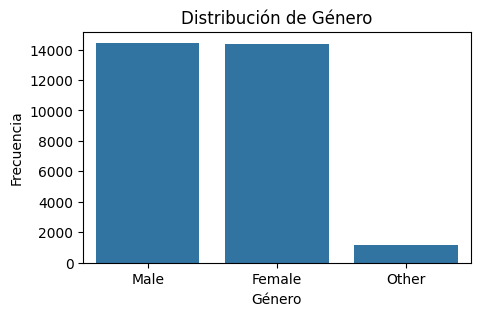

In [35]:
#Ahora el diagrama de barras
plt.figure(figsize=(5, 3))
sns.countplot(x='gender', data=df2)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

In [40]:
#ahora la diferencia entre el genero que tiene más y el que tiene menos
diferencia_generos=df2['gender'].value_counts().max() - df2['gender'].value_counts().min()
print("La diferencia entre el género que tiene más y el que tiene menos es:", diferencia_generos)


La diferencia entre el género que tiene más y el que tiene menos es: 13274


##4. Acá me pide hacer una copia, pero ya había hecho una, por lo que la siguiente copia será de la base de datos limpia de nulos una df4

In [48]:
df4 = df2.copy()

In [49]:
#identificamos los indices d las filas donde 'number of notifications' sea menor
#o igual a 15
indices_a_eliminar = df4[df4['number_of_notifications'] <= 15].index

#cuantas filas se van a eliminar?
cantidad_filas_eliminadas = len(indices_a_eliminar)
print("Cantidad de filas eliminadas:", cantidad_filas_eliminadas)

#calculamos la media de los indices eliminados
media_indices = np.mean(indices_a_eliminar)
print("Media de los índices eliminados:", media_indices)

#eliminar las filas
df4.drop(indices_a_eliminar, inplace=True)

#resultados
print("Filas eliminadas:", cantidad_filas_eliminadas)
print("Media de los índices eliminados:", media_indices)


Cantidad de filas eliminadas: 0
Media de los índices eliminados: nan
Filas eliminadas: 0
Media de los índices eliminados: nan


In [52]:
print(df2['number_of_notifications'].min())

30


No se eliminaron filas porque no existen registros con number_of_notifications <= 15. Por eso, la media de los índices eliminados es NaN.

##5. Otra Copia de la BD... df5 por ser la pregunta 5, ahora vemos cuantos trabajadores tienen **work hours per day >=2 y que utilicen face y tiktok**

In [53]:
df5 = df2.copy()

In [55]:
df5.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.025913,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.025913,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.025913,Telegram,66,6.214096,8.868753,4.951742,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [56]:
#creamos la condición: Usuarios con work_hours_per_day >=2.0 y que utilicen face y tik tok
condicion = (df5['work_hours_per_day'] >= 2.0) & (df5['social_platform_preference'].isin(['Facebook', 'TikTok']))


In [60]:
#esto es solo para verificar que no hay dato combinado tipo "Facebook y TikTok"
print(df5['social_platform_preference'].unique())

['Facebook' 'Twitter' 'Telegram' 'TikTok' 'Instagram']


In [61]:
#filtramos los datos
usuarios_filtrados = df5[condicion]

In [62]:
#usuarios que cumplen con la condición
cantidad_usuarios = len(usuarios_filtrados)
print("Cantidad de usuarios que cumplen con la condición:", cantidad_usuarios)

Cantidad de usuarios que cumplen con la condición: 11943


##6. Ahora vamos a graficar 5 columnas, así que voy a elegirlas primero ;)

In [63]:
df5.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.025913,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.025913,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.025913,Telegram,66,6.214096,8.868753,4.951742,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


Elijo un equilibrio entre productividad y bienestar

1.   Work_hours_per_day / / para ver cuantas horas trabajan cada día.
2.   perceveid_productivity_score / / para ver como sienten su productividad
3.   actual_productivity_score / / para saber cuan productivos son realmente
4.   stress_level / / para ver su nivel de estrés
5.   sleep_hours / / Es el indicador de cuanto descansan

**Escogí estas 5 columnas porque reflejan puntos importantes para graficar aspectos directamente relacionados con la productividad y me permiten también observar su estado de salud emocional y su descanso.**

El gráfico que utilizaré es el **Boxplots con Seaborn** porque puede mostrar la mediana, los cuartiles y los outliers

De esta forma podremos ver la distribución y los valores atipicos de mejor manera.

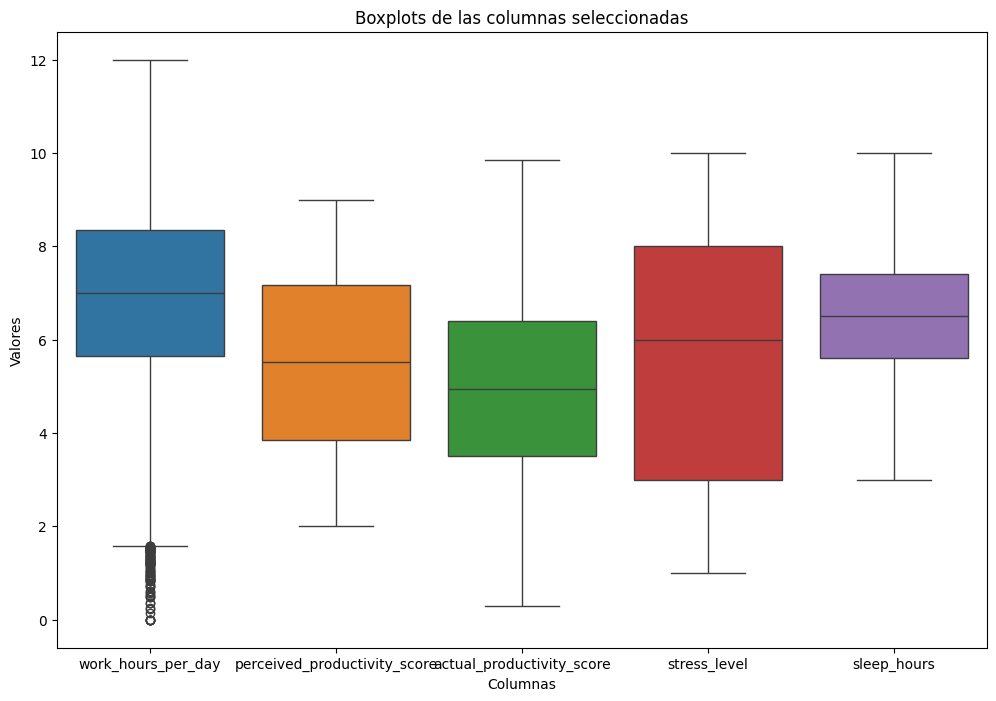

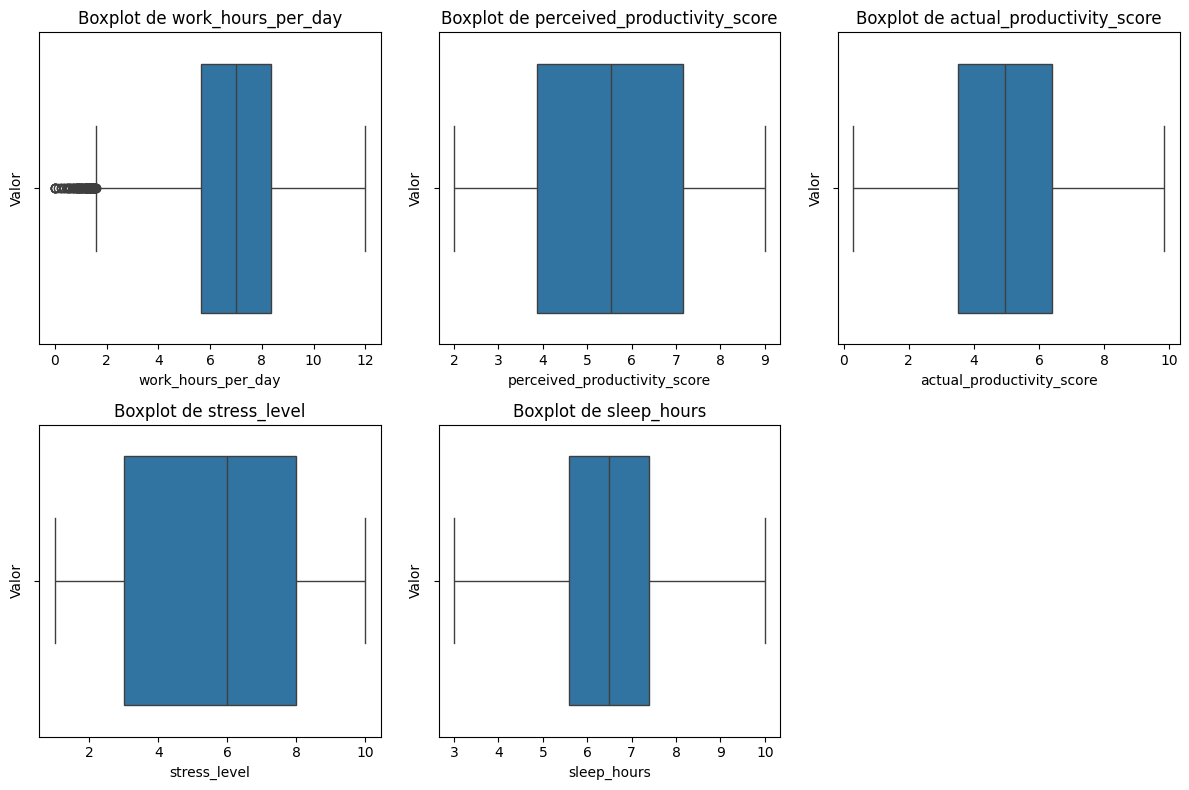

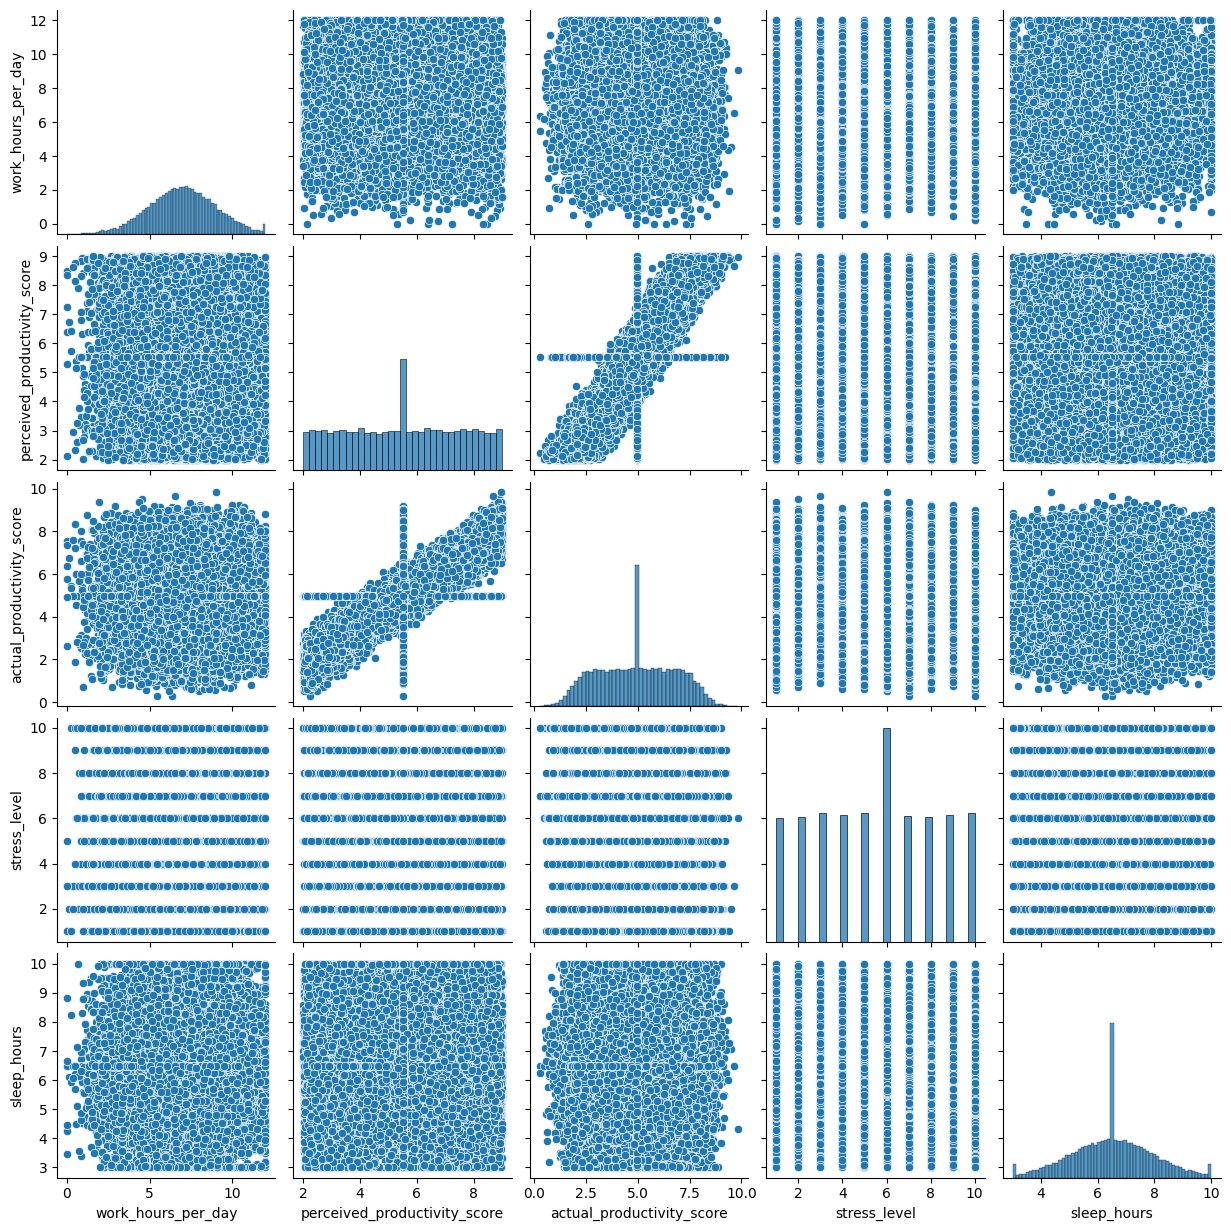

In [70]:
#columnas elegidas
columnas_seleccionadas=[
    'work_hours_per_day',
    'perceived_productivity_score',
    'actual_productivity_score',
    'stress_level',
    'sleep_hours'
]

#grafico boxplots
# para poder hacer la comparación directa
plt.figure(figsize=(12, 8))
sns.boxplot(data=df5[columnas_seleccionadas])
plt.title('Boxplots de las columnas seleccionadas')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.show()

#para tener más detalle
plt.figure(figsize=(12,8))
for i, col in enumerate(columnas_seleccionadas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df5[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.ylabel('Valor')
plt.tight_layout()
plt.show()

#este es solo por gusto (porque me gusta como se ve)
sns.pairplot(df5[columnas_seleccionadas])
plt.show()

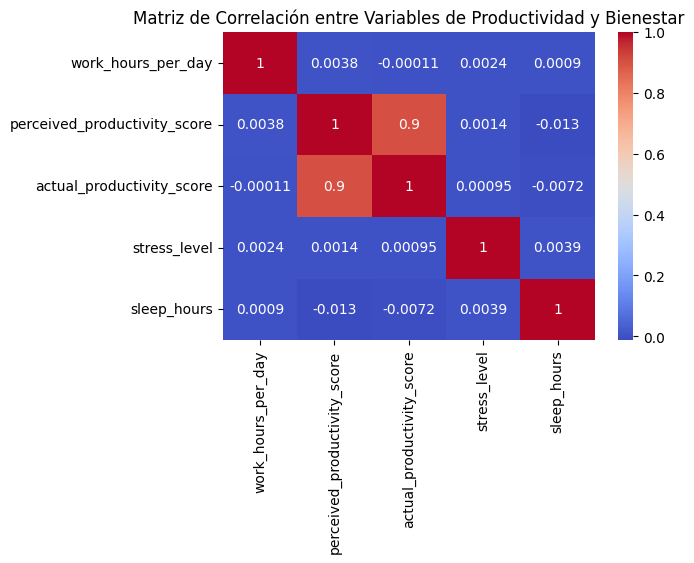

In [73]:
#Matriz de correlación para dar cumplimiento al punto 3 de la rúbrica publicada
correlacion=df5[columnas_seleccionadas].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables de Productividad y Bienestar')
plt.show()

##Interpretación de la Correlación de los datos

*   La correlación que más destaca es la de **actual_productivity_score y perceived_productivity_score** que presenta un coeficiente de 0.9, lo que nos muestra una fuerte relación positiva, es decir qué... quienes se sienten productivos, efectivamente son más productivos.
*   Las demás variables presentan muy baja correlación, muy cercanas a 0, lo que nos indica muy poca o nula relación lineal.
*   Aunque esperaba una correlación inversa entre **screen_time_before_sleep y sleep_hours**, en esta muestra al menos no hay evidencia estadística lo suficientemente fuerte que lo respalde.

Como conclusión puedo indicar que el resultado de la correlación sugiere ue la percepción del rendimiento tiene mayor consistencia con la productividad real que con otros factores como el estrés o el sueño.

## Indicadores Clave (KPI)

A continuación se presentan algunos indicadores clave obtenidos a partir de estadísticas descriptivas aplicadas al conjunto de datos:

- **Usuarios totales:** cantidad de registros en la base de datos.
- **Horas trabajadas por día (promedio):** mide la carga laboral diaria.
- **Nivel de estrés (promedio):** indicador emocional general.
- **Horas de sueño (promedio):** reflejo del descanso de los usuarios.
- **Cantidad de notificaciones (promedio):** indica nivel de interrupciones digitales.

Estos indicadores permiten comprender hábitos clave relacionados con la productividad y el bienestar digital.


In [75]:
print("Usuarios totales:", df2.shape[0])
print("Promedio de horas trabajadas por día:", df2['work_hours_per_day'].mean())
print("Promedio de nivel de estrés:", df2['stress_level'].mean())
print("Promedio de horas de sueño:", df2['sleep_hours'].mean())
print("Cantidad promedio de notificaciones recibidas:", df2['number_of_notifications'].mean())
#esto es para cumplir con la rúbrica publicada aunque no tiene mucho sentido ponerlo aquí;)

Usuarios totales: 30000
Promedio de horas trabajadas por día: 6.990792281703837
Promedio de nivel de estrés: 5.5449
Promedio de horas de sueño: 6.500082266758014
Cantidad promedio de notificaciones recibidas: 59.95876666666667


*En la Rúbrica se pide lo siguiente:
**Utiliza técnicas de transformación de datos adecuada de acuerdo a la naturaleza de estos**.*

Pero creo que hay un par de errores en la rúbrica, de todas formas dejo una pequeña normalización por si no hay error en la rúbrica y lo va a evaluar. Aunque tuve que buscar como hacerlo porque no recordaba si lo vimos en algún momento.

In [77]:
df2['normalized_sleep_hours'] = (df2['sleep_hours'] - df2['sleep_hours'].min()) / (df2['sleep_hours'].max() - df2['sleep_hours'].min())

print("Mínimo:", df2['normalized_sleep_hours'].min())
print("Máximo:", df2['normalized_sleep_hours'].max())
print("Primeros valores:")
print(df2[['sleep_hours', 'normalized_sleep_hours']].head())


Mínimo: 0.0
Máximo: 1.0
Primeros valores:
   sleep_hours  normalized_sleep_hours
0     5.116546                0.302364
1     5.103897                0.300557
2     8.583222                0.797603
3     6.052984                0.436141
4     5.405706                0.343672


##**Análisis de Datos - Evaluación 2 Fundamentos de Machine Learning**

Alumna: **Daniela Francisca Castillo Gallegos**

CRISP-DM aplicado para la limpieza, exploración y visualización

Cada respuesta incluye el código y la justificación escrita cuando corresponde.